In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math
import operator
from sklearn.metrics import confusion_matrix

**K Nearest Neighbours**

In [2]:
# Reading csv file
df = pd.read_csv('iris.data',header=None)

# Seperate data and class
iris = df.iloc[:,[0,1,2,3]].values
category = df.iloc[:,[-1]].values

# Assigning numbers for each class
op_cat = ['Iris-setosa','Iris-versicolor','Iris-virginica']
y = []
for i in range(len(category)):
  if category[i] == op_cat[0]:
    y.append(0)
  elif category[i] == op_cat[1]:
    y.append(1)
  elif category[i] == op_cat[2]:
    y.append(2)

# Calculating minimum and maximum value for each feature
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

# Normalizing the dataset considering each row
def normalize_dataset(dataset):
  minmax=dataset_minmax(dataset)
  for row in dataset:
    for i in range(len(row)):
      row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
   
normalize_dataset(iris)

# Function to compute the euclidean distance
def euclideanDistance(arr1, arr2):
  dist = 0
  for i in range(4):
    dist += (arr1[i] - arr2[i])**2
  return math.sqrt(dist)

# Function that gives all the neighbours
def getNeighbours(train, test, k):
  distance = []
  for i in range(len(train)):
    dist = euclideanDistance(test,train[i])
    distance.append((y[i],dist))
  distance.sort(key=operator.itemgetter(1))
  neighbours=[]
  for i in range(k):
    neighbours.append(distance[i][0])
  return neighbours

# Function that returns the class
def getClass(train, test, k):
  neighbours=getNeighbours(train,test,k)
  class_freq = [0,0,0]
  for i in range(len(neighbours)):
    response = neighbours[i]
    if response == 0:
      class_freq[0] += 1
    elif response == 1:
      class_freq[1] += 1
    elif response == 2:
      class_freq[2] += 1
    else:
      class_freq[response] = 0
  return class_freq.index(max(class_freq))

In [3]:
test1 = [5.1,2.5,3.2,4.3]
test2 = [4.9,3,1.4,0.2]
test3 = [6,3,4.8,1.8]

op = getClass(iris,test1,5)
print(op_cat[op])
op = getClass(iris,test2,5)
print(op_cat[op])
op = getClass(iris,test3,5)
print(op_cat[op])

Iris-virginica
Iris-virginica
Iris-virginica


In [4]:
# Calculating the predicted output for k = 5
y_pred=[]
for i in range(len(iris)):
  op = getClass(iris,iris[i],5)
  y_pred.append(op)

# Creating the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix")
print(cm)

# Finding accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 96.0
Accuracy of Iris-virginica is 92.0


In [5]:
# Calculating the predicted output for k = 3
y_pred=[]
for i in range(len(iris)):
  op = getClass(iris,iris[i],3)
  y_pred.append(op)

# Creating the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix")
print(cm)

# Finding accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 96.0
Accuracy of Iris-virginica is 94.0


In [6]:
# Calculating the predicted output for k = 4
y_pred=[]
for i in range(len(iris)):
  op = getClass(iris,iris[i],4)
  y_pred.append(op)

# Creating the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix")
print(cm)

# Finding accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 96.0
Accuracy of Iris-virginica is 92.0


In [7]:
# Calculating the predicted output for k = 6
y_pred=[]
for i in range(len(iris)):
  op = getClass(iris,iris[i],6)
  y_pred.append(op)

# Creating the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix")
print(cm)

# Finding accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[50  0  0]
 [ 0 49  1]
 [ 0  4 46]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 98.0
Accuracy of Iris-virginica is 92.0


In [8]:
# Calculating the predicted output for k = 7
y_pred=[]
for i in range(len(iris)):
  op = getClass(iris,iris[i],7)
  y_pred.append(op)

# Creating the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix")
print(cm)

# Finding accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[50  0  0]
 [ 0 49  1]
 [ 0  4 46]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 98.0
Accuracy of Iris-virginica is 92.0


In [9]:
# Calculating the predicted output for k = 8
y_pred=[]
for i in range(len(iris)):
  op = getClass(iris,iris[i],8)
  y_pred.append(op)

# Creating the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix")
print(cm)

# Finding accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[50  0  0]
 [ 0 49  1]
 [ 0  4 46]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 98.0
Accuracy of Iris-virginica is 92.0


In [10]:
# Calculating the predicted output for k = 9
y_pred=[]
for i in range(len(iris)):
  op = getClass(iris,iris[i],9)
  y_pred.append(op)

# Creating the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix")
print(cm)

# Finding accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[50  0  0]
 [ 0 49  1]
 [ 0  3 47]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 98.0
Accuracy of Iris-virginica is 94.0


In [11]:
# Calculating the predicted output for k = 10
y_pred=[]
for i in range(len(iris)):
  op = getClass(iris,iris[i],10)
  y_pred.append(op)

# Creating the confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix")
print(cm)

# Finding accuracy for each class
for i in range(len(cm[0])):
  sum = 0
  for j in range(len(cm[1])):
    sum += cm[i][j]
  acc = (cm[i][i] / float(sum)) * 100
  print("Accuracy of "+op_cat[i]+" is "+str(acc))

Confusion Matrix
[[50  0  0]
 [ 0 49  1]
 [ 0  4 46]]
Accuracy of Iris-setosa is 100.0
Accuracy of Iris-versicolor is 98.0
Accuracy of Iris-virginica is 92.0


Changing the value of k affects the accuracy of each class. The best accuracy is obtained at k=9 upon varying k from 3 to 10

**K Means Algorithm**

Text(0.5, 1.0, 'Data Points')

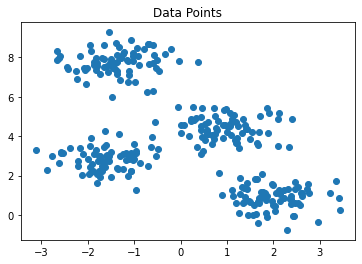

In [12]:
# Reading the dataset
df = pd.read_csv('dataset.csv')
x = df.iloc[:, [1,2]].values

# Plotting the data points
plt.scatter(x[:,0],x[:,1])
plt.title('Data Points')

Text(0.5, 1.0, 'K=2')

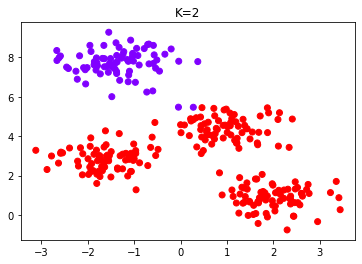

In [13]:
# Implementing the sklearn k-means algorithm for k=2
kmeans = KMeans(n_clusters = 2).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=2')

Text(0.5, 1.0, 'K=3')

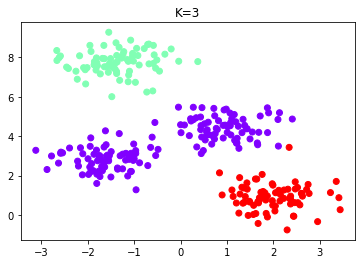

In [14]:
# Implementing the sklearn k-means algorithm for k=3
kmeans = KMeans(n_clusters = 3).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=3')

Text(0.5, 1.0, 'K=4')

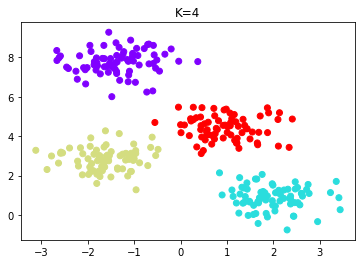

In [15]:
# Implementing the sklearn k-means algorithm for k=4
kmeans = KMeans(n_clusters = 4).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=4')

Text(0.5, 1.0, 'K=5')

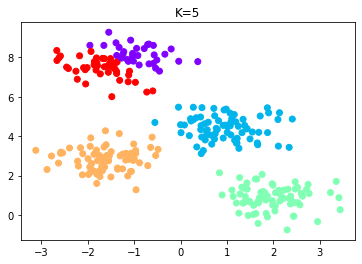

In [16]:
# Implementing the sklearn k-means algorithm for k=5
kmeans = KMeans(n_clusters = 5).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=5')

Text(0.5, 1.0, 'K=6')

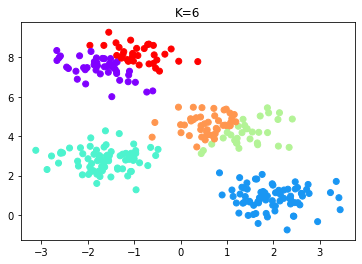

In [17]:
# Implementing the sklearn k-means algorithm for k=6
kmeans = KMeans(n_clusters = 6).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=6')

Text(0.5, 1.0, 'K=7')

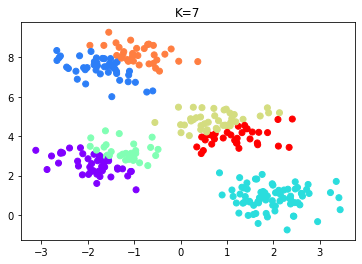

In [18]:
# Implementing the sklearn k-means algorithm for k=7
kmeans = KMeans(n_clusters = 7).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=7')

Text(0.5, 1.0, 'K=8')

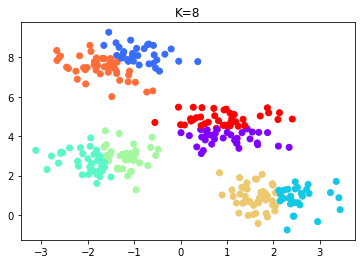

In [19]:
# Implementing the sklearn k-means algorithm for k=8
kmeans = KMeans(n_clusters = 8).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=8')

Text(0.5, 1.0, 'K=9')

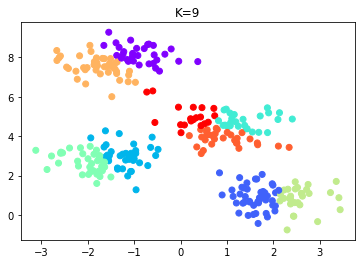

In [20]:
# Implementing the sklearn k-means algorithm for k=9
kmeans = KMeans(n_clusters = 9).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=9')

Text(0.5, 1.0, 'K=10')

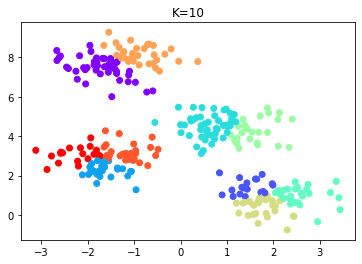

In [21]:
# Implementing the sklearn k-means algorithm for k=10
kmeans = KMeans(n_clusters = 10).fit(x)
y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=y, cmap='rainbow')
plt.title('K=10')

From the above plots, **k=4** is most appropriate for the dataset